# AST326 Lab 1: Basic Photonic Statistics
#### Author: Ayush Pandhi (1003227457)
#### Due Date: October 10, 2018

## General Setup

In [7]:
#Importing required modules
import numpy as np
import matplotlib.pyplot as plt
import math as m

#Defining required functions
def mean(data):
    n = len(data)
    mu = (sum(data)/n)
    return mu

def stddev(data):
    n = len(data)
    mu = mean(data)
    numerator = []
    for x in data:
        numerator.append((x - mu)**2)
    sigma = (sum(numerator)/n)**(1/2)
    return sigma

def wgtmean(data, errors):
    w = []
    for i in range(len(data)):
        w.append(1/(errors[i])**2)
    num = []
    for i in range(len(data)):
        num.append(data[i]*w[i])
    wgtmean = sum(num)/sum(w)
    return wgtmean

def wgtstddev(data, errors):
    w = []
    for i in range(len(data)):
        w.append(1/(errors[i])**2)
    wgtstddev = (1/sum(w))**0.5
    return wgtstddev

def poisson(min, max, mu):
    prob = [(((mu**x)/m.factorial(x))*(2.71828**(-mu))) for x in range(min, max)]
    return prob

def gaussian(data, mu, sigma):
    xdata = np.linspace(min(data), max(data), 1000)
    prob2 = [(1/(2*m.pi)*sigma**2)*(2.71828**(-(x - mu)**2/(2*sigma**2))) for x in xdata]
    return prob2

#Loading Lare and Small data files
largedata = np.loadtxt('largedata.txt')
smalldata = np.loadtxt('smalldata.txt')

## Mean and Standard Deviation

In [8]:
#Calculating and printing mean and standard deviation of each data set
#Getting weighted mean and stddev is not possible as there are no errors in this data set
mean_large = mean(largedata)
stddev_large = stddev(largedata)
mean_small = mean(smalldata)
stddev_small = stddev(smalldata)
print ('Mean and Standard Deviation of Large Data: ', mean_large, ' +- ', stddev_large)
print ('Mean and Standard Deviation of Small Data: ', mean_small, ' +- ', stddev_small)

#For spacing and ease of reading output
print()

#If we account for significant figures we get the the following instead
print ('Mean and Standard Deviation of Large Data (with significant figures): 22.1 +- 4.6')
print ('Mean and Standard Deviation of Small Data (with significant figures): 3.8 +- 1.9')

#For spacing and ease of reading output
print()

#Comparing to what we expect from Poisson statistics
print('From Poisson statistics we expect the standard deviation to be equal to the square root of the mean, which roughly seems to be the case here.')

Mean and Standard Deviation of Large Data:  22.082  +-  4.567195638463493
Mean and Standard Deviation of Small Data:  3.813  +-  1.90683795850618

Mean and Standard Deviation of Large Data (with significant figures): 22.1 +- 4.6
Mean and Standard Deviation of Small Data (with significant figures): 3.8 +- 1.9

From Poisson statistics we expect the standard deviation to be equal to the square root of the mean, which roughly seems to be the case here.


## Scatter Plots

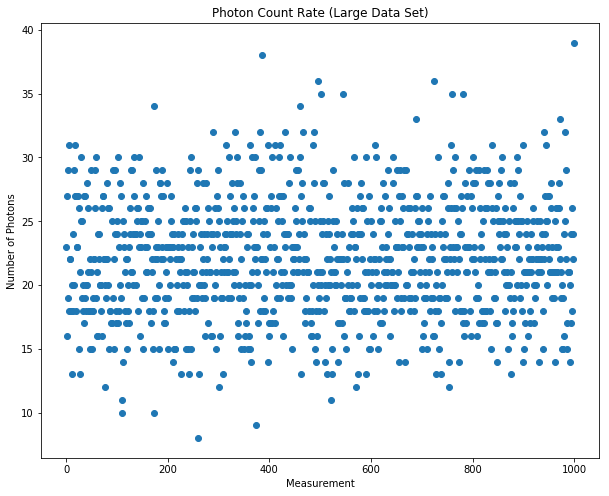

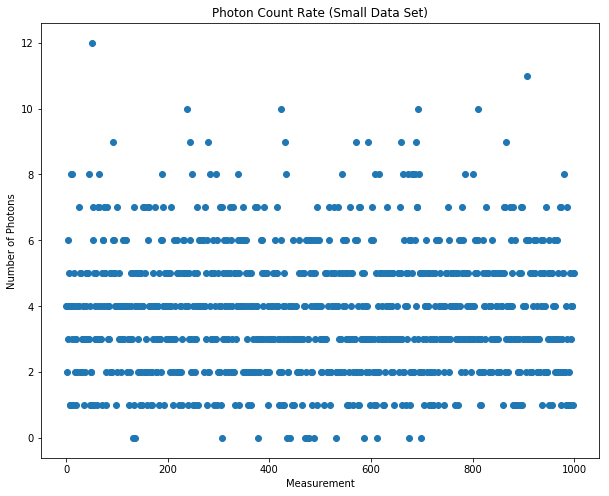

In [9]:
#Scatter plot for large data set
plt.figure(figsize = (10, 8))
plt.plot(largedata, 'o')
plt.title('Photon Count Rate (Large Data Set)')
plt.xlabel('Measurement')
plt.ylabel('Number of Photons')
plt.show()

#Scatter plot for small data set
plt.figure(figsize = (10, 8))
plt.plot(smalldata, 'o')
plt.title('Photon Count Rate (Small Data Set)')
plt.xlabel('Measurement')
plt.ylabel('Number of Photons')
plt.show()

## Histograms

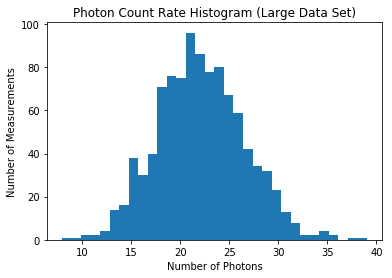

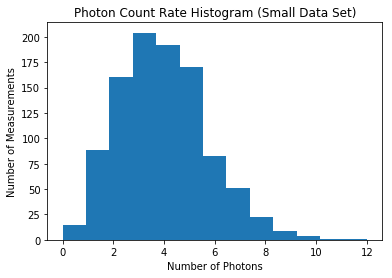


You can approximately get the mean and standard deviation of the Large data set to be 22.0 +- 5.0 but the Small data set is not so clear, especially in terms of standard deviation, In general the mean and standard deviation procuded by visual observation of these plots is not very accurate


In [47]:
#Histogram for large data set 
plt.hist(largedata, bins = 32)
plt.title('Photon Count Rate Histogram (Large Data Set)')
plt.xlabel('Number of Photons')
plt.ylabel('Number of Measurements')
plt.show()

#Hitogram for small data set
plt.hist(smalldata, bins = 13)
plt.title('Photon Count Rate Histogram (Small Data Set)')
plt.xlabel('Number of Photons')
plt.ylabel('Number of Measurements')
plt.show()

#For spacing and ease of reading output
print()

#Explaning if you can get mean and standard deviation directly from the plots
print('You can approximately get the mean and standard deviation of the Large data set to be 22.0 +- 5.0 but the Small data set is not so clear, especially in terms of standard deviation, In general the mean and standard deviation procuded by visual observation of these plots is not very accurate')

## Poisson Statistics

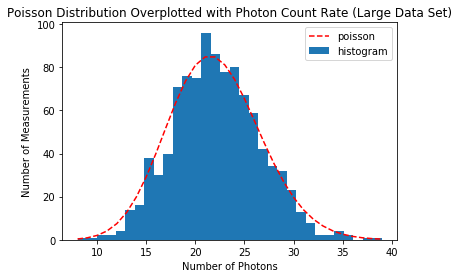

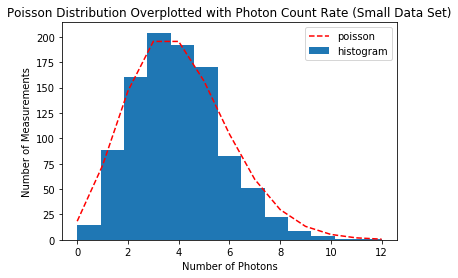


Both large and small data sets seem to follow a poisson_output distribution. The large data set does seem to follow it much closer but the small data set is also roughly follows a poisson_output distribution. The larger data set looks very close to a gaussian distribution while the small data set does not.


In [46]:
#Overplotting the poisson_output distriution onto the large data histogram (mu = 22)
xlin = np.arange(8, 40)
poisson_output = poisson(8, 40, 22)
gaussian_output = gaussian(xlin, mean_large, stddev_large)
plt.hist(largedata, bins = xlin.shape[0], normed=0, label='histogram')
plt.plot(xlin, 1000*(poisson_output/np.sum(poisson_output)/(xlin[1] - xlin[0])), 'r--', label='poisson')
plt.title('Poisson Distribution Overplotted with Photon Count Rate (Large Data Set)')
plt.xlabel('Number of Photons')
plt.ylabel('Number of Measurements')
plt.legend()
plt.show()

#Overplotting the poisson_output distriution onto the small data histogram (mu = 4)
xlin2 = np.arange(0, 13)
poisson_output2 = poisson(0, 13, 4)
gaussian_output2 = gaussian(xlin2, mean_small, stddev_small)
plt.hist(smalldata, bins = xlin2.shape[0], normed=0, label='histogram')
plt.plot(xlin2, 1000*(poisson_output2/np.sum(poisson_output2)/(xlin2[1] - xlin2[0])), 'r--', label='poisson')
plt.title('Poisson Distribution Overplotted with Photon Count Rate (Small Data Set)')
plt.xlabel('Number of Photons')
plt.ylabel('Number of Measurements')
plt.legend()
plt.show()

#For spacing and ease of reading poisson_output
print()

#Explaning if both data sets follow a poisson_output distribution
print('Both large and small data sets seem to follow a poisson_output distribution. The large data set does seem to follow it much closer but the small data set is also roughly follows a poisson_output distribution. The larger data set looks very close to a gaussian distribution while the small data set does not.')

## Gaussian Statistics

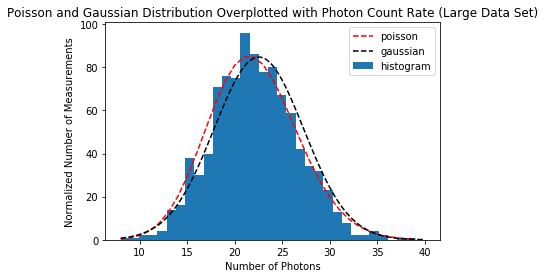

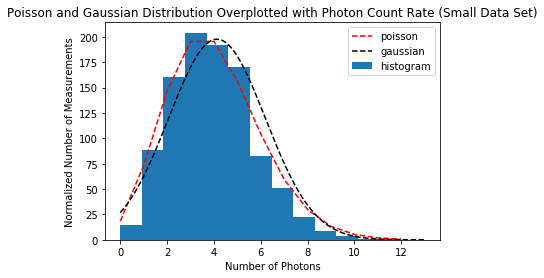

In [45]:
#Overplotting the poisson_output distriution onto the large data histogram (mu = 22)
xlin = np.arange(8, 40)
poisson_output = poisson(8, 40, 22)
gaussian_output = gaussian(xlin, mean_large, stddev_large)
plt.hist(largedata, bins = xlin.shape[0], normed=0, label='histogram')
plt.plot(xlin, 1000*(poisson_output/np.sum(poisson_output)/(xlin[1] - xlin[0])), 'r--', label='poisson')
plt.plot(np.linspace(8, 40, 1000), 1000*(gaussian_output/np.sum(gaussian_output)/(np.linspace(8, 40, 1000)[1] - np.linspace(8, 40, 1000)[0])), 'k--', label='gaussian')
plt.title('Poisson and Gaussian Distribution Overplotted with Photon Count Rate (Large Data Set)')
plt.xlabel('Number of Photons')
plt.ylabel('Normalized Number of Measurements')
plt.legend()
plt.show()

#Overplotting the poisson_output distriution onto the small data histogram (mu = 4)
xlin2 = np.arange(0, 13)
poisson_output2 = poisson(0, 13, 4)
gaussian_output2 = gaussian(xlin2, mean_small, stddev_small)
plt.hist(smalldata, bins = xlin2.shape[0], normed=0, label='histogram')
plt.plot(xlin2, 1000*(poisson_output2/np.sum(poisson_output2)/(xlin2[1] - xlin2[0])), 'r--', label='poisson')
plt.plot(np.linspace(0, 13, 1000), 1000*(gaussian_output2/np.sum(gaussian_output2)/(np.linspace(0, 13, 1000)[1] - np.linspace(0, 13, 1000)[0])), 'k--', label='gaussian')
plt.title('Poisson and Gaussian Distribution Overplotted with Photon Count Rate (Small Data Set)')
plt.xlabel('Number of Photons')
plt.ylabel('Normalized Number of Measurements')
plt.legend()
plt.show()